In [2]:
import matplotlib.pyplot as plt
import numpy as np
import csv

np.set_printoptions(formatter={'all':lambda x: str(x)})

In [12]:
spi_total = np.loadtxt("spiral_xp_plt.csv",
                 delimiter=",")


In [4]:
simple_total = np.loadtxt("simple_data.csv",
                 delimiter=",")

In [5]:
double_total = np.loadtxt("double_data.csv",
                 delimiter=",")

In [11]:
#fix DB size 
for i in range (14,23):
    fixed_db = spi_total[np.where(spi_total[:,0] == 2^i)]
    name = 'spiral_{}.csv'.format(i)

    with open(name, 'w') as f:
    # create the csv writer
        writer = csv.writer(f)
    # write a row to the csv file
        for row in fixed_db:
            writer.writerow(row)






## Hint: Fixing the record size and varying the DB size

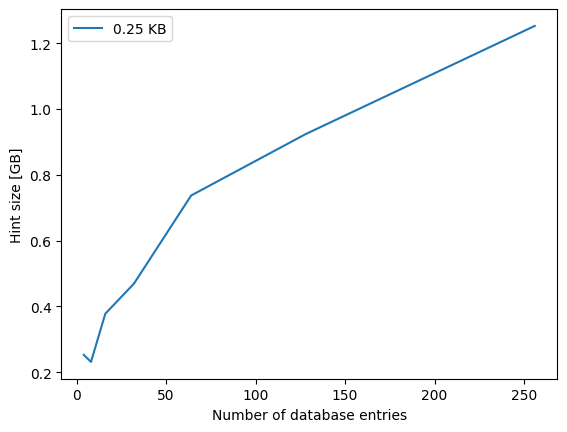

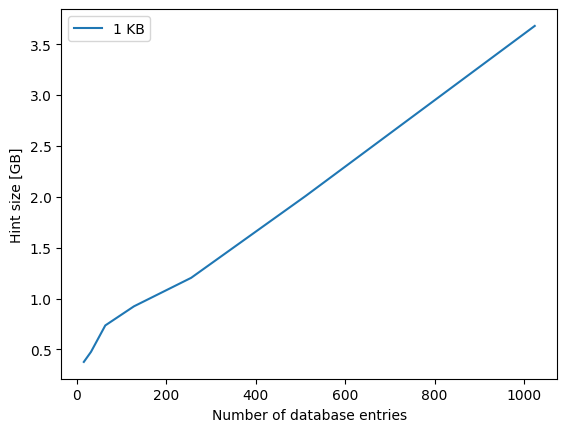

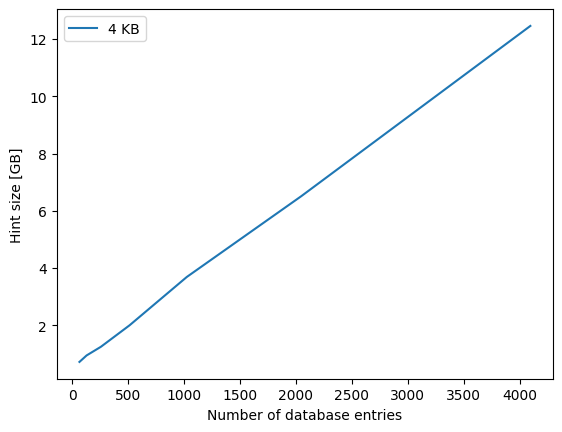

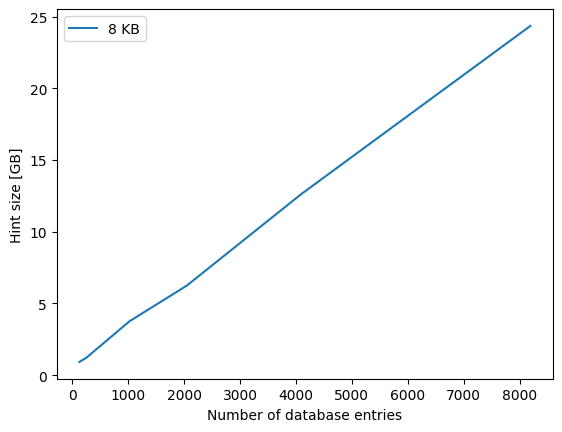

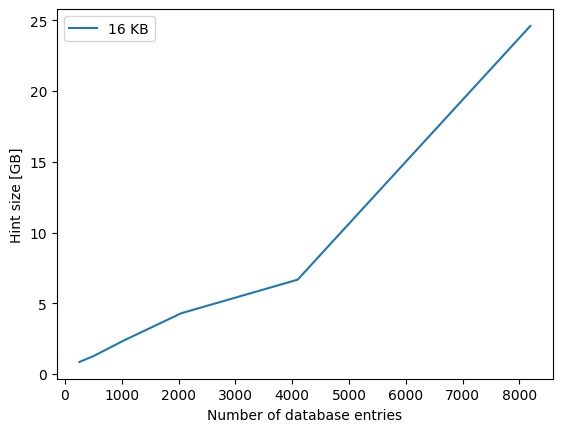

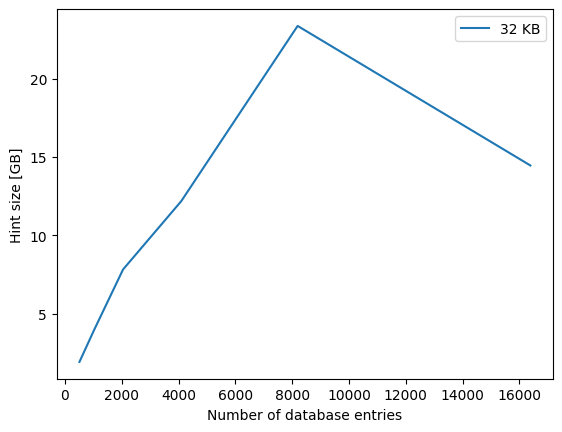

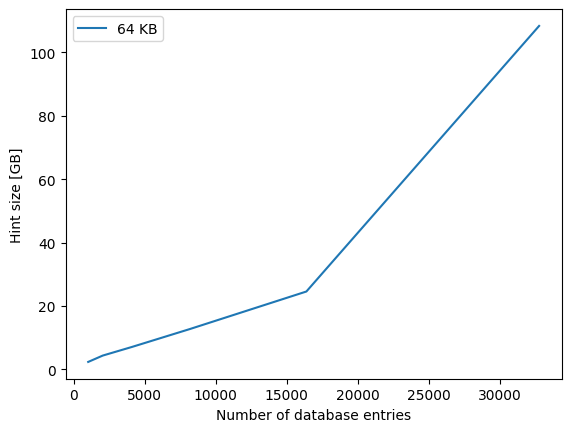

In [81]:

from matplotlib.ticker import LogLocator
import math
def log_2(x):
    return math.log2(x).astype(float)

def inv(x):
    return 2**x
power_rng= ['$2^14$','$2^14$','$2^14$','$2^14$','$2^14$','$2^14$','$2^14$']

for i in [0.25,1,4,8,16,32,64]:
    #hint 
    mine = spi_total[np.where(spi_total[:,1] == i)]
    sorted_spi = mine[mine[:, 2].argsort()]
    total_size = sorted_spi[:,2] #MB
    hint = sorted_spi[:,5]/1024**2 #GB
    name = '{} KB'.format(i)
    # fig, ax = plt.subplots()
    # plt.xticks(total_size)
    # We need to draw the canvas, otherwise the labels won't be positioned and 
    # won't have values yet.
    # fig.canvas.draw()
    # labels = [item.get_text() for item in ax.get_xticklabels()]
    # labels = "hello"
    # ax.set_xticklabels(power_rng)
    # ax.xaxis.set_major_locator(LogLocator(base=2))
    plt.plot(total_size, hint, label = name)
    plt.legend()
    # plt.yscale('log')
    # plt.xscale('log')
    plt.xlabel("Number of database entries")
    plt.ylabel("Hint size [GB]")

    plt.show()



# plt.yscale('log')
# plt.xscale('log')


   

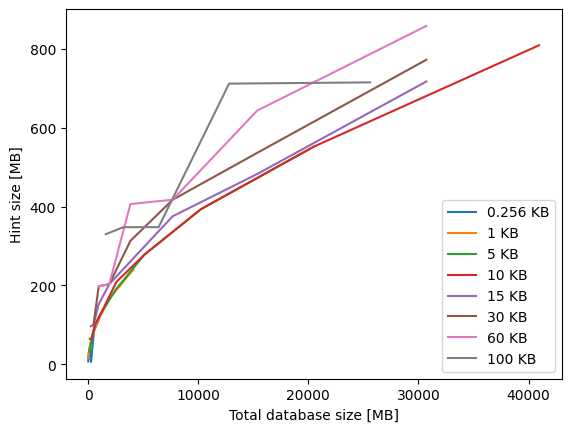

In [189]:
#simple


for i in [0.256,1,5,10,15,30,60,100]:
    #hint 
    mine = simple_total[np.where(simple_total[:,1] == i)]
    sorted_spi = mine[mine[:, 2].argsort()]

    total_size = mine[:,2]/1024

    hint = sorted_spi[:,5]/1024
    name = '{} KB'.format(i)
    plt.plot(total_size, hint, label = name)
plt.legend()
plt.xlabel("Total database size [MB]")
plt.ylabel("Hint size [MB]")
plt.show()


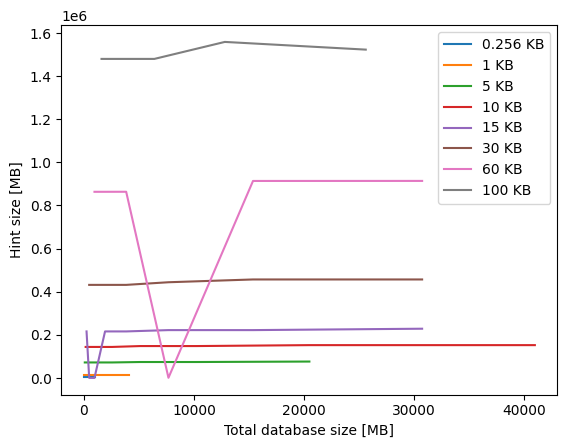

In [191]:
#double

#fix record size 
for i in [0.256,1,5,10,15,30,60,100]:
    #hint 
    mine = double_total[np.where(double_total[:,1] == i)]
    sorted_spi = mine[mine[:, 2].argsort()]

    total_size = mine[:,2]/(1024)

    hint = mine[:,5]/(1024)
    name = '{} KB'.format(i)
    plt.plot(total_size, hint, label = name)
plt.legend()
plt.xlabel("Total database size [MB]")
plt.ylabel("Hint size [MB]")
plt.show()

## Fixing th DB size

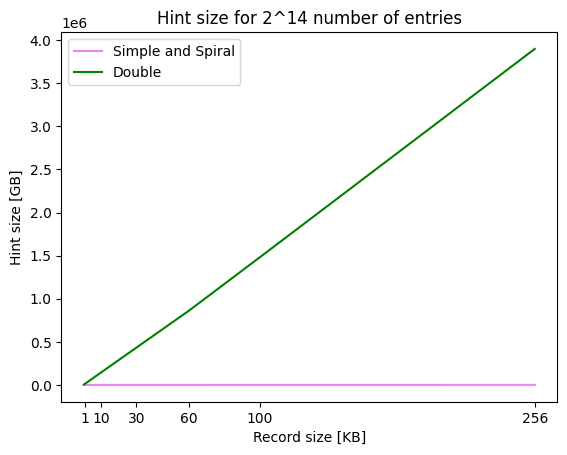

In [219]:
#spiral+double+simple 2^14

mine = simple_total[np.where(simple_total[:,0] == 16384)]
hint_simp = mine[:,5]/(1024)
# total_size = mine[:,2]/(1024**2)
rec_size = [0.256,1,5,10,15,30,60,100,256]
plt.plot(rec_size, hint_simp,label =  'Simple and Spiral', color ='violet')


# mine = spi_total[np.where(spi_total[:,0] == 16384)]
# hint = mine[:,5]/(1024**2)
# plt.plot([0.256,1,5,10,15,30,60,100,256], hint,alpha = 0.5,label = 'Spiral')

mine = double_total[np.where(double_total[:,0] == 16384)]
hint = mine[:,5]/(1024)
plt.plot(rec_size, hint, label =  'Double',  color ='green')

plt.legend()
plt.xticks([1,10,30,60,100,256])

plt.xlabel("Record size [KB]")
plt.ylabel("Hint size [GB]")
plt.title("Hint size for 2^14 number of entries")
plt.show()

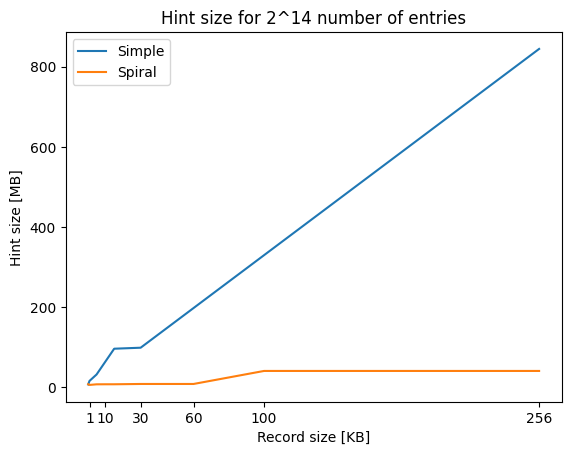

In [197]:


mine = simple_total[np.where(simple_total[:,0] == 16384)]
hint_simp = mine[:,5]/(1024)
total_size = mine[:,2]/(1024)
rec_size = [0.256,1,5,10,15,30,60,100,256]
plt.plot(rec_size, hint_simp,label =  'Simple')


mine = spi_total[np.where(spi_total[:,0] == 16384)]
hint = mine[:,5]/(1024)
plt.plot(rec_size, hint,label = 'Spiral')
plt.legend()
plt.margins(x=0.05,y=0.05)
plt.xlabel("Record size [KB]")
plt.ylabel("Hint size [MB]")
plt.xticks([1,10,30,60,100,256])
plt.title("Hint size for 2^14 number of entries")
plt.show()

## Query generation

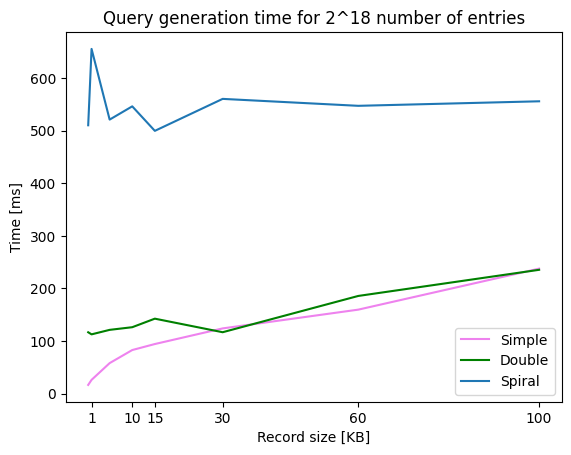

In [255]:
#spiral+double+simple 2^18

mine = simple_total[np.where(simple_total[:,0] == 262144)]
time = mine[:,3]/(1000)
# total_size = mine[:,2]/(1024**2)
rec_size = [0.256,1,5,10,15,30,60,100]
plt.plot(rec_size, time,label =  'Simple', color ='violet')

mine = double_total[np.where(double_total[:,0] == 262144)]
time = mine[:,3]/(1000)
plt.plot(rec_size, time, label =  'Double',  color ='green')

mine = spi_total[np.where(spi_total[:,0] == 262144)]
time = mine[:,3]/(1000)
plt.plot(rec_size, time,label = 'Spiral')



plt.legend()
plt.xticks([1,10,15,30,60,100])

plt.xlabel("Record size [KB]")
plt.ylabel("Time [ms]")
plt.title("Query generation time for 2^18 number of entries")
plt.show()

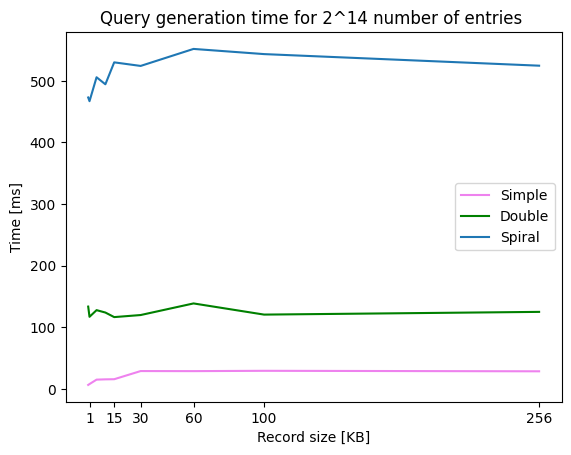

In [256]:
#spiral+double+simple 2^14

mine = simple_total[np.where(simple_total[:,0] == 16384)]
time = mine[:,3]/(1000)
# total_size = mine[:,2]/(1024**2)
rec_size = [0.256,1,5,10,15,30,60,100,256]
plt.plot(rec_size, time,label =  'Simple', color ='violet')

mine = double_total[np.where(double_total[:,0] == 16384)]
time = mine[:,3]/(1000)
plt.plot(rec_size, time, label =  'Double',  color ='green')

mine = spi_total[np.where(spi_total[:,0] == 16384)]
time = mine[:,3]/(1000)
plt.plot(rec_size, time,label = 'Spiral')


plt.legend()
plt.xticks([1,15,30,60,100, 256])

plt.xlabel("Record size [KB]")
plt.ylabel("Time [ms]")
plt.title("Query generation time for 2^14 number of entries ")
plt.show()

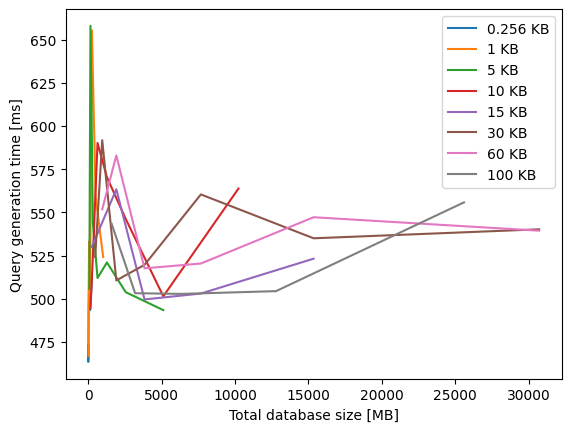

In [257]:
#Spiral
for i in [0.256,1,5,10,15,30,60,100]:
    #hint 
    mine = spi_total[np.where(spi_total[:,1] == i)]
    sorted_spi = mine[mine[:, 2].argsort()]
    total_size = sorted_spi[:,2]/1024
    gen = sorted_spi[:,3]/1000
    name = '{} KB'.format(i)
    plt.plot(total_size, gen, label = name)
plt.legend()
plt.xlabel("Total database size [MB]")
plt.ylabel("Query generation time [ms]")
plt.show()


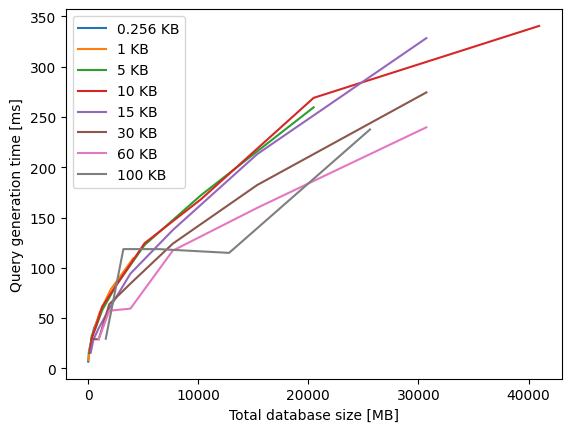

In [258]:
#simple


for i in [0.256,1,5,10,15,30,60,100]:
    #hint 
    mine = simple_total[np.where(simple_total[:,1] == i)]
    sorted_spi = mine[mine[:, 2].argsort()]

    total_size = mine[:,2]/1024

    gen = sorted_spi[:,3]/1000
    name = '{} KB'.format(i)
    plt.plot(total_size, gen, label = name)
plt.legend()
plt.xlabel("Total database size [MB]")
plt.ylabel("Query generation time [ms]")
plt.show()

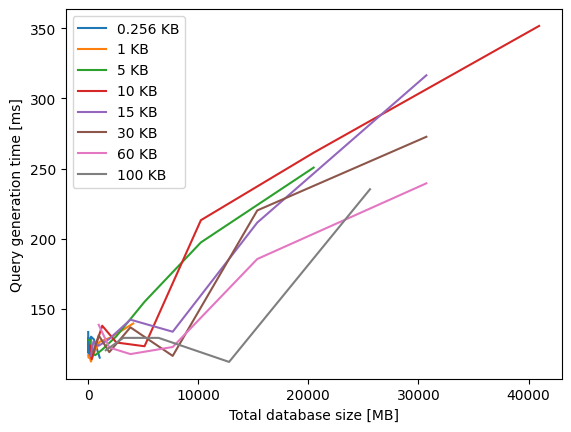

In [259]:
#double

#fix record size 
for i in [0.256,1,5,10,15,30,60,100]:
    #hint 
    mine = double_total[np.where(double_total[:,1] == i)]
    sorted_spi = mine[mine[:, 2].argsort()]

    total_size = mine[:,2]/(1024)

    gen = mine[:,3]/(1000)
    name = '{} KB'.format(i)
    plt.plot(total_size, gen, label = name)
plt.legend()
plt.xlabel("Total database size [MB]")
plt.ylabel("Query generation time [ms]")
plt.show()

## Query processing

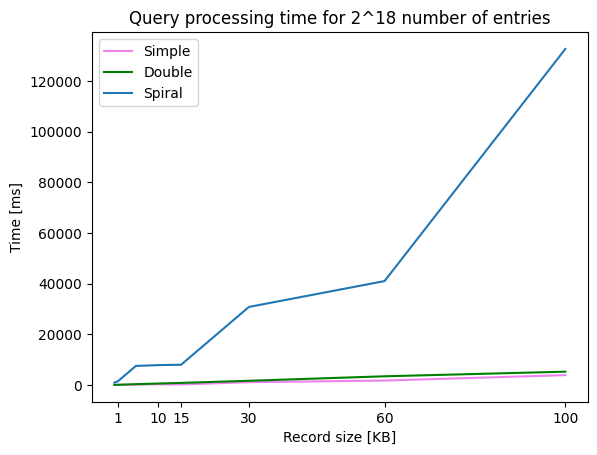

In [260]:
#spiral+double+simple 2^18

mine = simple_total[np.where(simple_total[:,0] == 262144)]
time = mine[:,4]/(1000)
# total_size = mine[:,2]/(1024**2)
rec_size = [0.256,1,5,10,15,30,60,100]
plt.plot(rec_size, time,label =  'Simple', color ='violet')

mine = double_total[np.where(double_total[:,0] == 262144)]
time = mine[:,4]/(1000)
plt.plot(rec_size, time, label =  'Double',  color ='green')

mine = spi_total[np.where(spi_total[:,0] == 262144)]
time = mine[:,4]/(1000)
plt.plot(rec_size, time,label = 'Spiral')



plt.legend()
plt.xticks([1,10,15,30,60,100])

plt.xlabel("Record size [KB]")
plt.ylabel("Time [ms]")
plt.title("Query processing time for 2^18 number of entries")
plt.show()

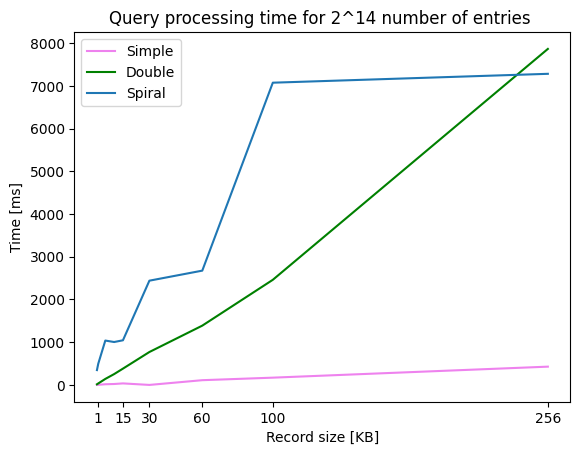

In [268]:

#spiral+double+simple 2^14

mine = simple_total[np.where(simple_total[:,0] == 16384)]
time = mine[:,4]/(1000)
# total_size = mine[:,2]/(1024**2)
rec_size = [0.256,1,5,10,15,30,60,100,256]
plt.plot(rec_size, time,label =  'Simple', color ='violet')

mine = double_total[np.where(double_total[:,0] == 16384)]
time = mine[:,4]/(1000)
plt.plot(rec_size, time, label =  'Double',  color ='green')

mine = spi_total[np.where(spi_total[:,0] == 16384)]
time = mine[:,4]/(1000)
plt.plot(rec_size, time,label = 'Spiral')


plt.legend()
plt.xticks([1,15,30,60,100, 256])

plt.xlabel("Record size [KB]")
plt.ylabel("Time [ms]")
plt.title("Query processing time for 2^14 number of entries ")
plt.show()

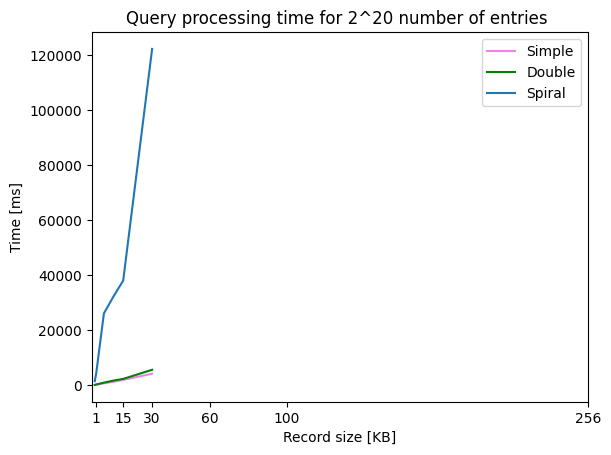

In [271]:

#spiral+double+simple 2^20

mine = simple_total[np.where(simple_total[:,0] == 1048576)]
time = mine[:,4]/(1000)
# total_size = mine[:,2]/(1024**2)
rec_size = [0.256,1,5,10,15,30]
plt.plot(rec_size, time,label =  'Simple', color ='violet')

mine = double_total[np.where(double_total[:,0] == 1048576)]
time = mine[:,4]/(1000)
plt.plot(rec_size, time, label =  'Double',  color ='green')

mine = spi_total[np.where(spi_total[:,0] == 1048576)]
time = mine[:,4]/(1000)
plt.plot(rec_size, time,label = 'Spiral')


plt.legend()
plt.xticks([1,15,30,60,100, 256])

plt.xlabel("Record size [KB]")
plt.ylabel("Time [ms]")
plt.title("Query processing time for 2^20 number of entries ")
plt.show()

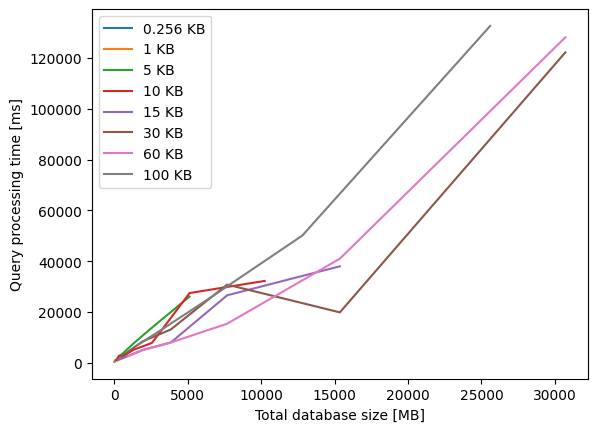

In [267]:
#Spiral
for i in [0.256,1,5,10,15,30,60,100]:
    #hint 
    mine = spi_total[np.where(spi_total[:,1] == i)]
    sorted_spi = mine[mine[:, 2].argsort()]
    total_size = sorted_spi[:,2]/1024
    gen = sorted_spi[:,6]/1024
    name = '{} KB'.format(i)
    plt.plot(total_size, gen, label = name)
plt.legend()
plt.xlabel("Total database size [MB]")
plt.ylabel("Query processing time [ms]")
plt.show()

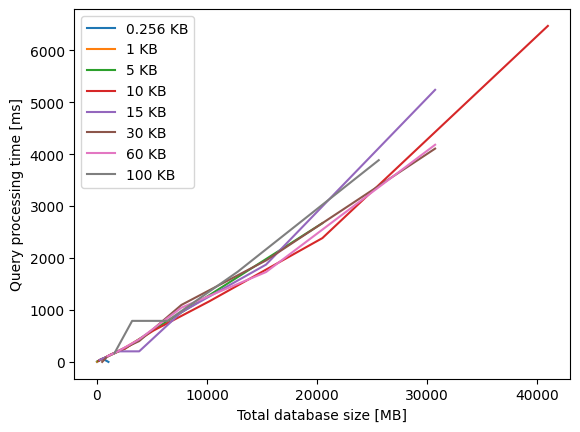

In [266]:

#simple


for i in [0.256,1,5,10,15,30,60,100]:
    #hint 
    mine = simple_total[np.where(simple_total[:,1] == i)]
    sorted_spi = mine[mine[:, 2].argsort()]

    total_size = mine[:,2]/1024

    gen = sorted_spi[:,6]/1024
    name = '{} KB'.format(i)
    plt.plot(total_size, gen, label = name)
plt.legend()
plt.xlabel("Total database size [MB]")
plt.ylabel("Query processing time [ms]")
plt.show()

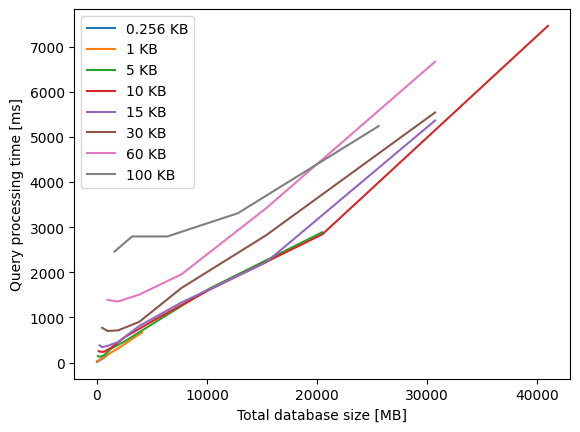

In [265]:

#double

#fix record size 
for i in [0.256,1,5,10,15,30,60,100]:
    #hint 
    mine = double_total[np.where(double_total[:,1] == i)]
    sorted_spi = mine[mine[:, 2].argsort()]

    total_size = mine[:,2]/(1024)

    gen = mine[:,4]/(1000)
    name = '{} KB'.format(i)
    plt.plot(total_size, gen, label = name)
plt.legend()
plt.xlabel("Total database size [MB]")
plt.ylabel("Query processing time [ms]")
plt.show()

## Query size

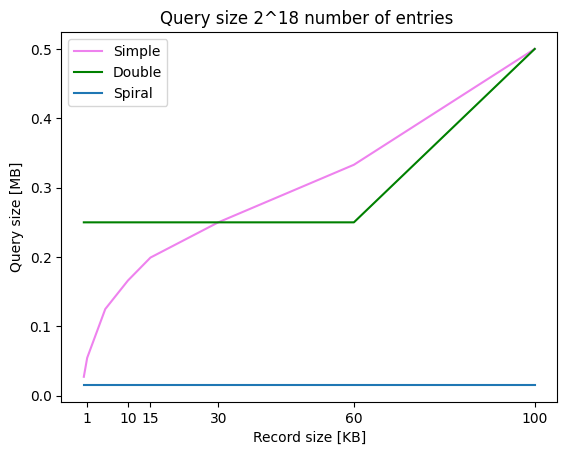

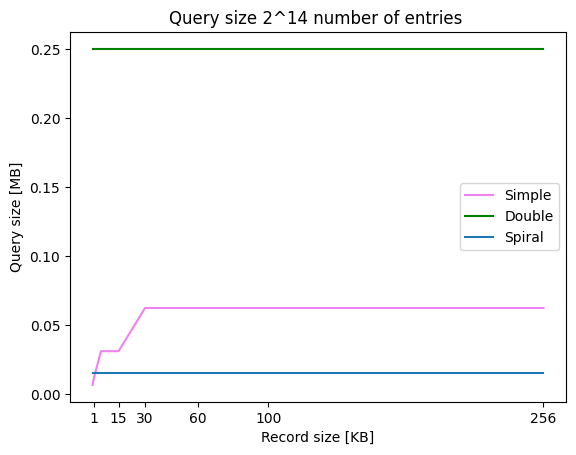

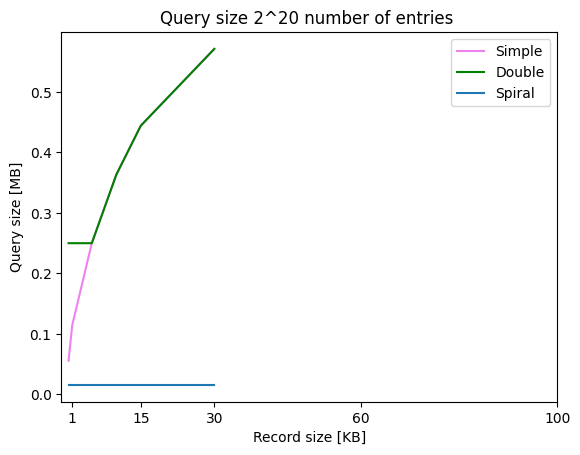

In [276]:
#spiral+double+simple 2^18

mine = simple_total[np.where(simple_total[:,0] == 262144)]
time = mine[:,6]/(1024)
# total_size = mine[:,2]/(1024**2)
rec_size = [0.256,1,5,10,15,30,60,100]
plt.plot(rec_size, time,label =  'Simple', color ='violet')

mine = double_total[np.where(double_total[:,0] == 262144)]
time = mine[:,6]/(1024)
plt.plot(rec_size, time, label =  'Double',  color ='green')

mine = spi_total[np.where(spi_total[:,0] == 262144)]
time = mine[:,6]/(1024)
plt.plot(rec_size, time,label = 'Spiral')



plt.legend()
plt.xticks([1,10,15,30,60,100])

plt.xlabel("Record size [KB]")
plt.ylabel("Query size [MB]")
plt.title("Query size 2^18 number of entries ")
plt.show()


#spiral+double+simple 2^14

mine = simple_total[np.where(simple_total[:,0] == 16384)]
time = mine[:,6]/(1024)
# total_size = mine[:,2]/(1024**2)
rec_size = [0.256,1,5,10,15,30,60,100,256]
plt.plot(rec_size, time,label =  'Simple', color ='violet')

mine = double_total[np.where(double_total[:,0] == 16384)]
time = mine[:,6]/(1024)
plt.plot(rec_size, time, label =  'Double',  color ='green')

mine = spi_total[np.where(spi_total[:,0] == 16384)]
time = mine[:,6]/(1024)
plt.plot(rec_size, time,label = 'Spiral')


plt.legend()
plt.xticks([1,15,30,60,100, 256])

plt.xlabel("Record size [KB]")
plt.ylabel("Query size [MB]")
plt.title("Query size 2^14 number of entries ")
plt.show()
#spiral+double+simple 2^20

mine = simple_total[np.where(simple_total[:,0] == 1048576)]
time = mine[:,6]/(1024)
# total_size = mine[:,2]/(1024**2)
rec_size = [0.256,1,5,10,15,30]
plt.plot(rec_size, time,label =  'Simple', color ='violet')

mine = double_total[np.where(double_total[:,0] == 1048576)]
time = mine[:,6]/(1024)
plt.plot(rec_size, time, label =  'Double',  color ='green')

mine = spi_total[np.where(spi_total[:,0] == 1048576)]
time = mine[:,6]/(1024)
plt.plot(rec_size, time,label = 'Spiral')


plt.legend()
plt.xticks([1,15,30,60,100])

plt.xlabel("Record size [KB]")
plt.ylabel("Query size [MB]")
plt.title("Query size 2^20 number of entries ")
plt.show()

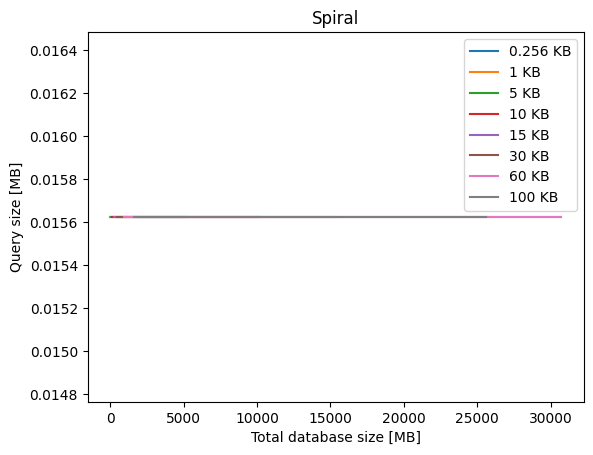

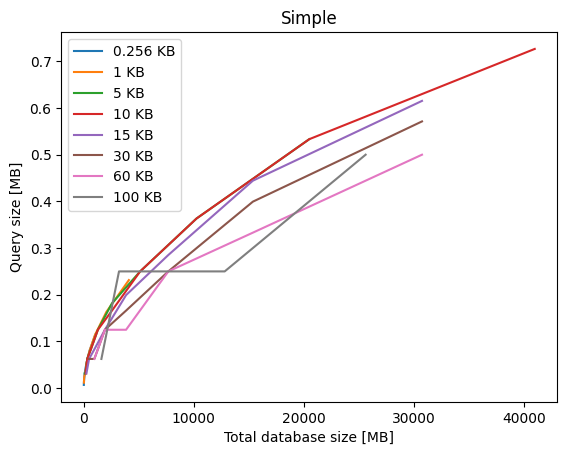

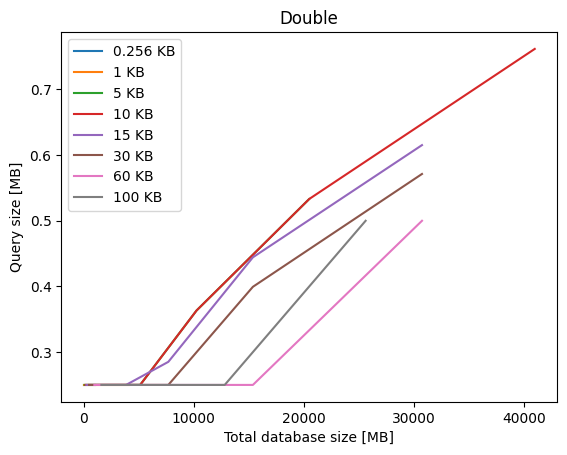

In [278]:
#Spiral
for i in [0.256,1,5,10,15,30,60,100]:
    #hint 
    mine = spi_total[np.where(spi_total[:,1] == i)]
    sorted_spi = mine[mine[:, 2].argsort()]
    total_size = sorted_spi[:,2]/1024
    gen = sorted_spi[:,6]/1024
    name = '{} KB'.format(i)
    plt.plot(total_size, gen, label = name)
plt.legend()
plt.xlabel("Total database size [MB]")
plt.ylabel("Query size [MB]")
plt.title("Spiral")

plt.show()
#simple


for i in [0.256,1,5,10,15,30,60,100]:
    #hint 
    mine = simple_total[np.where(simple_total[:,1] == i)]
    sorted_spi = mine[mine[:, 2].argsort()]

    total_size = mine[:,2]/1024

    gen = sorted_spi[:,6]/1024
    name = '{} KB'.format(i)
    plt.plot(total_size, gen, label = name)
plt.legend()
plt.xlabel("Total database size [MB]")
plt.ylabel("Query size [MB]")
plt.title("Simple")

plt.show()
#double

#fix record size 
for i in [0.256,1,5,10,15,30,60,100]:
    #hint 
    mine = double_total[np.where(double_total[:,1] == i)]
    sorted_spi = mine[mine[:, 2].argsort()]

    total_size = mine[:,2]/(1024)

    gen = mine[:,6]/(1024)
    name = '{} KB'.format(i)
    plt.plot(total_size, gen, label = name)
plt.legend()
plt.xlabel("Total database size [MB]")
plt.ylabel("Query size [MB]")
plt.title("Double")
plt.show()

In [29]:
#fix record size 
for i in [0.256,1,5,10,15,30,60,100]:
    #hint 
    fixed_db = spi_total[np.where(spi_total[:,1] == i)][3]
    name = 'spiral_{}KB.csv'.format(i)
  
    with open(name, 'w') as f:
    # create the csv writer
        writer = csv.writer(f)
    # write a row to the csv file
        for row in fixed_db:
            writer.writerow(row)

In [30]:
#Sort by total DB size

sorted_spi = spi_total[spi_total[:, 2].argsort()]



array([[1.50000000e+01, 2.56000000e-01, 4.63400000e+05, 3.78088800e+08,
        5.37600000e+03, 1.60000000e+01, 1.40000000e+01],
       [1.60000000e+01, 2.56000000e-01, 4.66400000e+05, 5.27030600e+08,
        6.27200000e+03, 1.60000000e+01, 1.40000000e+01],
       [1.40000000e+01, 1.02400000e+03, 4.67000000e+05, 4.96581600e+08,
        6.27200000e+03, 1.60000000e+01, 1.40000000e+01],
       [1.40000000e+01, 2.56000000e-01, 4.73000000e+05, 3.47089200e+08,
        8.06400000e+03, 1.60000000e+01, 1.10000000e+01],
       [1.70000000e+01, 2.56000000e-01, 4.89200000e+05, 5.80554600e+08,
        6.33600000e+03, 1.60000000e+01, 1.40000000e+01],
       [2.00000000e+01, 5.12000000e+03, 4.93400000e+05, 2.60835118e+10,
        1.02400000e+04, 1.60000000e+01, 6.00000000e+01],
       [1.90000000e+01, 2.56000000e-01, 4.93400000e+05, 9.91660400e+08,
        7.80800000e+03, 1.60000000e+01, 2.00000000e+01],
       [1.40000000e+01, 1.02400000e+04, 4.94400000e+05, 1.00443880e+09,
        7.93600000e+03, 1